## Exploratory Data Analysis using Pandas
Based on the concepts that we have built in the last couple of weeks, we will explore the imdb dataset today. Before we do that, let's first look at ways of loading the datasets as pandas dataframe.

### Loading Data
You can read data from a CSV file using the read_csv function. By default, it assumes that the fields are comma-separated.
Pandas supports following file formats:

|Function| Description|
|:---|:---|
|read_csv | Load delimited data from a file, URL, or file-like object. Use comma as default delimiter|
|read_table | Load delimited data from a file, URL, or file-like object. Use tab ('\t') as default delimiter|
|read_fwf | Read data in fixed-width column format (that is, no delimiters)|
|read_clipboard | Version of read_table that reads data from the clipboard. Useful for converting tables from web pages.|

For most of the analysis work, you will be loading the csv, tsv or some delimited files. We will only look at `read_csv` function in this example.


In [11]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

>Lets load the cast, release-dates and titles dataset.

> This might take sometime.

In [12]:
%%time
cast = pd.DataFrame.from_csv('../sample_datasets/2012_NYC_Noise_Complaints.csv', index_col=None)

CPU times: user 861 ms, sys: 70.8 ms, total: 932 ms
Wall time: 933 ms


Lets look at some of the contents of these dataframes

> The `n` in the cast dataframe tells us the rank or the order of the leading roles.

In [13]:
cast.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,34948062,12/06/2016,01/27/2017,DEP,Department of Environmental Protection,Noise,Noise: air condition/ventilation equipment (NV1),NaN,11201.0,126 SMITH STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.687463,-73.989980,"(40.68746331512711, -73.98997955415469)"
1,34953179,12/07/2016,04/14/2017,EDC,Economic Development Corporation,Noise - Helicopter,Other,Above Address,10302.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.620843,-74.141782,"(40.62084281879067, -74.14178167104572)"
2,34955318,12/07/2016,04/14/2017,EDC,Economic Development Corporation,Noise - Helicopter,Other,Above Address,NaN,LATHROP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,34964322,12/08/2016,04/14/2017,EDC,Economic Development Corporation,Noise - Helicopter,Other,Above Address,10312.0,112 FORRESTAL AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.555864,-74.178188,"(40.55586376726334, -74.17818835276702)"
4,34964381,12/08/2016,04/14/2017,EDC,Economic Development Corporation,Noise - Helicopter,Other,Above Address,11358.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.756400,-73.804527,"(40.75639993728445, -73.80452706129081)"


In [15]:
cast['Created Date'][0]

'12/06/2016'

In [19]:
# how many complaints were filed during spring 2017?
comp_spring = cast[(cast['Created Date'] >='01/01/2017') & (cast['Created Date'] <='03/31/2017')]

In [22]:
# and what are the complaint types are distributed in these complaints?
#pd.groupby?
comp_spring.groupby('Complaint Type').count() #.size()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Collection Truck Noise,47,47,37,47,47,47,47,27,27,27,...,0,0,0,0,0,0,0,27,27,27
Noise,4402,4402,4358,4402,4402,4402,0,4374,3498,3498,...,0,0,0,0,0,0,0,4350,4350,4350
Noise - Commercial,3808,3808,3801,3808,3808,3808,3808,3795,3602,3602,...,0,0,0,0,0,0,0,3791,3791,3791
Noise - Helicopter,55,55,52,55,55,55,55,54,39,39,...,0,0,0,0,0,0,0,54,54,54
Noise - House of Worship,60,60,60,60,60,60,60,60,56,56,...,0,0,0,0,0,0,0,60,60,60
Noise - Park,45,45,45,45,45,45,45,45,13,13,...,0,0,0,0,0,0,0,45,45,45
Noise - Residential,17918,17918,17908,17918,17918,17918,17918,17892,17680,17680,...,0,0,0,0,0,0,0,17886,17886,17886
Noise - Street/Sidewalk,1919,1919,1915,1919,1919,1919,1919,1910,1547,1547,...,0,0,0,0,0,0,0,1905,1905,1905
Noise - Vehicle,1262,1262,1260,1262,1262,1262,1262,1253,987,987,...,0,0,0,0,0,0,0,1247,1247,1247


In [24]:
# instead of integer numbers, we're more interested in its percentage values:
comp_spring.groupby('Complaint Type').size().divide(len(cast))

Complaint Type
Collection Truck Noise      0.000531
Noise                       0.049778
Noise - Commercial          0.043061
Noise - Helicopter          0.000622
Noise - House of Worship    0.000678
Noise - Park                0.000509
Noise - Residential         0.202619
Noise - Street/Sidewalk     0.021700
Noise - Vehicle             0.014271
dtype: float64

Lets plot these:

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 <a list of 9 Text xticklabel objects>)

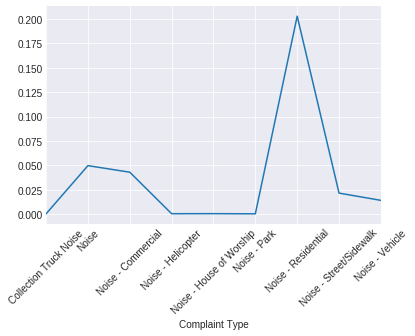

In [37]:
comp_spring.groupby('Complaint Type').size().divide(len(cast)).plot()
plt.xticks(rotation=45)

Pandas provides matplotlib based plotting as a part of dataframe. To plot any dataframe (with *plottable data*) you can simply use `.plot()`.

Of course we can also do this manually using matplotlib's `pyplot` as well (which is actually what pandas uses under the cover)

In [39]:
comp_spring.groupby('Complaint Type').size().divide(len(cast))

Complaint Type
Collection Truck Noise      0.000531
Noise                       0.049778
Noise - Commercial          0.043061
Noise - Helicopter          0.000622
Noise - House of Worship    0.000678
Noise - Park                0.000509
Noise - Residential         0.202619
Noise - Street/Sidewalk     0.021700
Noise - Vehicle             0.014271
dtype: float64

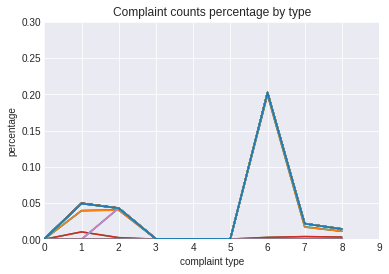

In [52]:
fig, ax = plt.subplots()
ax.plot(range(9), comp_spring.groupby('Complaint Type').count().divide(len(cast)))
ax.set_xlabel("complaint type")
ax.set_ylabel("percentage")
ax.set_xlim([0,9])
ax.set_ylim([0,.3])
ax.set_title("Complaint counts percentage by type")

Hmm.. How about the total complaint counts by zipcode? Which area has the most complaints? And which area has the most complaints by type?

(0, 10)

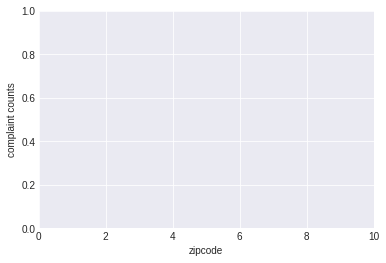

In [50]:
fig, ax = plt.subplots()
#ax.plot
ax.set_ylabel("complaint counts")
ax.set_xlabel("zipcode")
ax.set_xlim([0,10])
ax.set_ylim([0,10])

In [15]:
# And lets take a look at co2 emmisions dataset. Dir: /sample_datasets/global_co2_emission.csv
co2 = pd.read_csv('../sample_datasets/global_co2_emission.csv')
co2.head()

,Year,Total
0,1880,865.412
1,1881,891.081
2,1882,938.752
3,1883,997.424
4,1884,1008.425


In [9]:
# calculate a decade average and plot it out

In [14]:
co2.Year.dtype

dtype('int64')